In [10]:
import pandas as pd
import csv
import sqlite3 as sq
import numpy as np

In [2]:
countries = pd.read_csv("Demographic.csv")
countries

,Country Name,Country Code,Birth rate,Internet users,Income Group
0,Aruba,ABW,10.244,78.9,High income
1,Afghanistan,AFG,35.253,5.9,Low income
2,Angola,AGO,45.985,19.1,Upper middle income
3,Albania,ALB,12.877,57.2,Upper middle income
4,United Arab Emirates,ARE,11.044,88.0,High income
...,...,...,...,...,...
190,"Yemen, Rep.",YEM,32.947,20.0,Lower middle income
191,South Africa,ZAF,20.850,46.5,Upper middle income
192,"Congo, Dem. Rep.",COD,42.394,2.2,Low income
193,Zambia,ZMB,40.471,15.4,Lower middle income


In [3]:
Country_Code = list (["ABW","AFG","AGO","ALB","ARE","ARG","ARM","ATG","AUS","AUT","AZE","BDI","BEL","BEN","BFA","BGD","BGR","BHR","BHS","BIH","BLR","BLZ","BOL","BRA","BRB","BRN","BTN","BWA","CAF","CAN","CHE","CHL","CHN","CIV","CMR","COG","COL","COM","CPV","CRI","CUB","CYP","CZE","DEU","DJI","DNK","DOM","DZA","ECU","EGY","ERI","ESP","EST","ETH","FIN","FJI","FRA","FSM","GAB","GBR","GEO","GHA","GIN","GMB","GNB","GNQ","GRC","GRD","GTM","GUM","GUY","HKG","HND","HRV","HTI","HUN","IDN","IND","IRL","IRN","IRQ","ISL","ITA","JAM","JOR","JPN","KAZ","KEN","KGZ","KHM","KIR","KOR","KWT","LAO","LBN","LBR","LBY","LCA","LKA","LSO","LTU","LUX","LVA","MAC","MAR","MDA","MDG","MDV","MEX","MKD","MLI","MLT","MMR","MNE","MNG","MOZ","MRT","MUS","MWI","MYS","NAM","NCL","NER","NGA","NIC","NLD","NOR","NPL","NZL","OMN","PAK","PAN","PER","PHL","PNG","POL","PRI","PRT","PRY","PYF","QAT","ROU","RUS","RWA","SAU","SDN","SEN","SGP","SLB","SLE","SLV","SOM","SSD","STP","SUR","SVK","SVN","SWE","SWZ","SYR","TCD","TGO","THA","TJK","TKM","TLS","TON","TTO","TUN","TUR","TZA","UGA","UKR","URY","USA","UZB","VCT","VEN","VIR","VNM","VUT","WSM","YEM","ZAF","COD","ZMB","ZWE"])
Life_Expectancy_At_Birth_1960 = list ([65.5693658536586,32.328512195122,32.9848292682927,62.2543658536585,52.2432195121951,65.2155365853659,65.8634634146342,61.7827317073171,70.8170731707317,68.5856097560976,60.836243902439,41.2360487804878,69.7019512195122,37.2782682926829,34.4779024390244,45.8293170731707,69.2475609756098,52.0893658536585,62.7290487804878,60.2762195121951,67.7080975609756,59.9613658536585,42.1183170731707,54.2054634146342,60.7380487804878,62.5003658536585,32.3593658536585,50.5477317073171,36.4826341463415,71.1331707317073,71.3134146341463,57.4582926829268,43.4658048780488,36.8724146341463,41.523756097561,48.5816341463415,56.716756097561,41.4424390243903,48.8564146341463,60.5761951219512,63.9046585365854,69.5939268292683,70.3487804878049,69.3129512195122,44.0212682926829,72.1765853658537,51.8452682926829,46.1351219512195,53.215,48.0137073170732,37.3629024390244,69.1092682926829,67.9059756097561,38.4057073170732,68.819756097561,55.9584878048781,69.8682926829268,57.5865853658537,39.5701219512195,71.1268292682927,63.4318536585366,45.8314634146342,34.8863902439024,32.0422195121951,37.8404390243902,36.7330487804878,68.1639024390244,59.8159268292683,45.5316341463415,61.2263414634146,60.2787317073171,66.9997073170732,46.2883170731707,64.6086585365854,42.1000975609756,68.0031707317073,48.6403170731707,41.1719512195122,69.691756097561,44.945512195122,48.0306829268293,73.4286585365854,69.1239024390244,64.1918292682927,52.6852682926829,67.6660975609756,58.3675853658537,46.3624146341463,56.1280731707317,41.2320243902439,49.2159756097561,53.0013170731707,60.3479512195122,43.2044634146342,63.2801219512195,34.7831707317073,42.6411951219512,57.303756097561,59.7471463414634,46.5107073170732,69.8473170731707,68.4463902439024,69.7868292682927,64.6609268292683,48.4466341463415,61.8127804878049,39.9746829268293,37.2686341463415,57.0656341463415,60.6228048780488,28.2116097560976,67.6017804878049,42.7363902439024,63.7056097560976,48.3688048780488,35.0037073170732,43.4830975609756,58.7452195121951,37.7736341463415,59.4753414634146,46.8803902439024,58.6390243902439,35.5150487804878,37.1829512195122,46.9988292682927,73.3926829268293,73.549756097561,35.1708292682927,71.2365853658537,42.6670731707317,45.2904634146342,60.8817073170732,47.6915853658537,57.8119268292683,38.462243902439,67.6804878048781,68.7196097560976,62.8089268292683,63.7937073170732,56.3570487804878,61.2060731707317,65.6424390243903,66.0552926829268,42.2492926829268,45.6662682926829,48.1876341463415,38.206,65.6598292682927,49.3817073170732,30.3315365853659,49.9479268292683,36.9658780487805,31.6767073170732,50.4513658536585,59.6801219512195,69.9759268292683,68.9780487804878,73.0056097560976,44.2337804878049,52.768243902439,38.0161219512195,40.2728292682927,54.6993170731707,56.1535365853659,54.4586829268293,33.7271219512195,61.3645365853659,62.6575853658537,42.009756097561,45.3844146341463,43.6538780487805,43.9835609756098,68.2995365853659,67.8963902439025,69.7707317073171,58.8855365853659,57.7238780487805,59.2851219512195,63.7302195121951,59.0670243902439,46.4874878048781,49.969512195122,34.3638048780488,49.0362926829268,41.0180487804878,45.1098048780488,51.5424634146342])
Life_Expectancy_At_Birth_2013 = list ([75.3286585365854,60.0282682926829,51.8661707317073,77.537243902439,77.1956341463415,75.9860975609756,74.5613658536585,75.7786585365854,82.1975609756098,80.890243902439,70.6931463414634,56.2516097560976,80.3853658536585,59.3120243902439,58.2406341463415,71.245243902439,74.4658536585366,76.5459512195122,75.0735365853659,76.2769268292683,72.4707317073171,69.9820487804878,67.9134390243903,74.1224390243903,75.3339512195122,78.5466585365854,69.1029268292683,64.3608048780488,49.8798780487805,81.4011219512195,82.7487804878049,81.1979268292683,75.3530243902439,51.2084634146342,55.0418048780488,61.6663902439024,73.8097317073171,62.9321707317073,72.9723658536585,79.2252195121951,79.2563902439025,79.9497804878049,78.2780487804878,81.0439024390244,61.6864634146342,80.3024390243903,73.3199024390244,74.5689512195122,75.648512195122,70.9257804878049,63.1778780487805,82.4268292682927,76.4243902439025,63.4421951219512,80.8317073170732,69.9179268292683,81.9682926829268,68.9733902439024,63.8435853658537,80.9560975609756,74.079512195122,61.1420731707317,58.216487804878,59.9992682926829,54.8384146341464,57.2908292682927,80.6341463414634,73.1935609756098,71.4863902439024,78.872512195122,66.3100243902439,83.8317073170732,72.9428536585366,77.1268292682927,62.4011463414634,75.2682926829268,68.7046097560976,67.6604146341463,81.0439024390244,75.1259756097561,69.4716829268293,83.1170731707317,82.290243902439,73.4689268292683,73.9014146341463,83.3319512195122,70.45,60.9537804878049,70.2024390243902,67.7720487804878,65.7665853658537,81.459756097561,74.462756097561,65.687243902439,80.1288780487805,60.5203902439024,71.6576829268293,74.9127073170732,74.2402926829268,49.3314634146342,74.1634146341464,81.7975609756098,73.9804878048781,80.3391463414634,73.7090487804878,68.811512195122,64.6739024390244,76.6026097560976,76.5326585365854,75.1870487804878,57.5351951219512,80.7463414634146,65.6540975609756,74.7583658536585,69.0618048780488,54.641512195122,62.8027073170732,74.46,61.466,74.567512195122,64.3438780487805,77.1219512195122,60.8281463414634,52.4421463414634,74.514756097561,81.1048780487805,81.4512195121951,69.222,81.4073170731707,76.8410487804878,65.9636829268293,77.4192195121951,74.2838536585366,68.1315609756097,62.4491707317073,76.8487804878049,78.7111951219512,80.3731707317073,72.7991707317073,76.3340731707317,78.4184878048781,74.4634146341463,71.0731707317073,63.3948292682927,74.1776341463415,63.1670487804878,65.878756097561,82.3463414634146,67.7189268292683,50.3631219512195,72.4981463414634,55.0230243902439,55.2209024390244,66.259512195122,70.99,76.2609756097561,80.2780487804878,81.7048780487805,48.9379268292683,74.7157804878049,51.1914878048781,59.1323658536585,74.2469268292683,69.4001707317073,65.4565609756098,67.5223658536585,72.6403414634147,70.3052926829268,73.6463414634147,75.1759512195122,64.2918292682927,57.7676829268293,71.159512195122,76.8361951219512,78.8414634146341,68.2275853658537,72.8108780487805,74.0744146341464,79.6243902439024,75.756487804878,71.669243902439,73.2503902439024,63.583512195122,56.7365853658537,58.2719268292683,59.2373658536585,55.633])

In [4]:
# Copy the code inside cell below and paste/run in your notebook to generate three new lists
Countries_2012_Dataset = list (["Aruba","Afghanistan","Angola","Albania","United Arab Emirates","Argentina","Armenia","Antigua and Barbuda","Australia","Austria","Azerbaijan","Burundi","Belgium","Benin","Burkina Faso","Bangladesh","Bulgaria","Bahrain","Bahamas, The","Bosnia and Herzegovina","Belarus","Belize","Bermuda","Bolivia","Brazil","Barbados","Brunei Darussalam","Bhutan","Botswana","Central African Republic","Canada","Switzerland","Chile","China","Cote d'Ivoire","Cameroon","Congo, Rep.","Colombia","Comoros","Cabo Verde","Costa Rica","Cuba","Cayman Islands","Cyprus","Czech Republic","Germany","Djibouti","Denmark","Dominican Republic","Algeria","Ecuador","Egypt, Arab Rep.","Eritrea","Spain","Estonia","Ethiopia","Finland","Fiji","France","Micronesia, Fed. Sts.","Gabon","United Kingdom","Georgia","Ghana","Guinea","Gambia, The","Guinea-Bissau","Equatorial Guinea","Greece","Grenada","Greenland","Guatemala","Guam","Guyana","Hong Kong SAR, China","Honduras","Croatia","Haiti","Hungary","Indonesia","India","Ireland","Iran, Islamic Rep.","Iraq","Iceland","Israel","Italy","Jamaica","Jordan","Japan","Kazakhstan","Kenya","Kyrgyz Republic","Cambodia","Kiribati","Korea, Rep.","Kuwait","Lao PDR","Lebanon","Liberia","Libya","St. Lucia","Liechtenstein","Sri Lanka","Lesotho","Lithuania","Luxembourg","Latvia","Macao SAR, China","Morocco","Moldova","Madagascar","Maldives","Mexico","Macedonia, FYR","Mali","Malta","Myanmar","Montenegro","Mongolia","Mozambique","Mauritania","Mauritius","Malawi","Malaysia","Namibia","New Caledonia","Niger","Nigeria","Nicaragua","Netherlands","Norway","Nepal","New Zealand","Oman","Pakistan","Panama","Peru","Philippines","Papua New Guinea","Poland","Puerto Rico","Portugal","Paraguay","French Polynesia","Qatar","Romania","Russian Federation","Rwanda","Saudi Arabia","Sudan","Senegal","Singapore","Solomon Islands","Sierra Leone","El Salvador","Somalia","Serbia","South Sudan","Sao Tome and Principe","Suriname","Slovak Republic","Slovenia","Sweden","Swaziland","Seychelles","Syrian Arab Republic","Chad","Togo","Thailand","Tajikistan","Turkmenistan","Timor-Leste","Tonga","Trinidad and Tobago","Tunisia","Turkey","Tanzania","Uganda","Ukraine","Uruguay","United States","Uzbekistan","St. Vincent and the Grenadines","Venezuela, RB","Virgin Islands (U.S.)","Vietnam","Vanuatu","West Bank and Gaza","Samoa","Yemen, Rep.","South Africa","Congo, Dem. Rep.","Zambia","Zimbabwe"])
Codes_2012_Dataset = list (["ABW","AFG","AGO","ALB","ARE","ARG","ARM","ATG","AUS","AUT","AZE","BDI","BEL","BEN","BFA","BGD","BGR","BHR","BHS","BIH","BLR","BLZ","BMU","BOL","BRA","BRB","BRN","BTN","BWA","CAF","CAN","CHE","CHL","CHN","CIV","CMR","COG","COL","COM","CPV","CRI","CUB","CYM","CYP","CZE","DEU","DJI","DNK","DOM","DZA","ECU","EGY","ERI","ESP","EST","ETH","FIN","FJI","FRA","FSM","GAB","GBR","GEO","GHA","GIN","GMB","GNB","GNQ","GRC","GRD","GRL","GTM","GUM","GUY","HKG","HND","HRV","HTI","HUN","IDN","IND","IRL","IRN","IRQ","ISL","ISR","ITA","JAM","JOR","JPN","KAZ","KEN","KGZ","KHM","KIR","KOR","KWT","LAO","LBN","LBR","LBY","LCA","LIE","LKA","LSO","LTU","LUX","LVA","MAC","MAR","MDA","MDG","MDV","MEX","MKD","MLI","MLT","MMR","MNE","MNG","MOZ","MRT","MUS","MWI","MYS","NAM","NCL","NER","NGA","NIC","NLD","NOR","NPL","NZL","OMN","PAK","PAN","PER","PHL","PNG","POL","PRI","PRT","PRY","PYF","QAT","ROU","RUS","RWA","SAU","SDN","SEN","SGP","SLB","SLE","SLV","SOM","SRB","SSD","STP","SUR","SVK","SVN","SWE","SWZ","SYC","SYR","TCD","TGO","THA","TJK","TKM","TLS","TON","TTO","TUN","TUR","TZA","UGA","UKR","URY","USA","UZB","VCT","VEN","VIR","VNM","VUT","PSE","WSM","YEM","ZAF","COD","ZMB","ZWE"])
Regions_2012_Dataset = list (["The Americas","Asia","Africa","Europe","Middle East","The Americas","Asia","The Americas","Oceania","Europe","Asia","Africa","Europe","Africa","Africa","Asia","Europe","Middle East","The Americas","Europe","Europe","The Americas","The Americas","The Americas","The Americas","The Americas","Asia","Asia","Africa","Africa","The Americas","Europe","The Americas","Asia","Africa","Africa","Africa","The Americas","Africa","Africa","The Americas","The Americas","The Americas","Europe","Europe","Europe","Africa","Europe","The Americas","Africa","The Americas","Africa","Africa","Europe","Europe","Africa","Europe","Oceania","Europe","Oceania","Africa","Europe","Asia","Africa","Africa","Africa","Africa","Africa","Europe","The Americas","The Americas","The Americas","Oceania","The Americas","Asia","The Americas","Europe","The Americas","Europe","Asia","Asia","Europe","Middle East","Middle East","Europe","Middle East","Europe","The Americas","Middle East","Asia","Asia","Africa","Asia","Asia","Oceania","Asia","Middle East","Asia","Middle East","Africa","Africa","The Americas","Europe","Asia","Africa","Europe","Europe","Europe","Asia","Africa","Europe","Africa","Asia","The Americas","Europe","Africa","Europe","Asia","Europe","Asia","Africa","Africa","Africa","Africa","Asia","Africa","Oceania","Africa","Africa","The Americas","Europe","Europe","Asia","Oceania","Middle East","Asia","The Americas","The Americas","Asia","Oceania","Europe","The Americas","Europe","The Americas","Oceania","Middle East","Europe","Europe","Africa","Middle East","Africa","Africa","Asia","Oceania","Africa","The Americas","Africa","Europe","Africa","Africa","The Americas","Europe","Europe","Europe","Africa","Africa","Middle East","Africa","Africa","Asia","Asia","Asia","Asia","Oceania","The Americas","Africa","Europe","Africa","Africa","Europe","The Americas","The Americas","Asia","The Americas","The Americas","The Americas","Asia","Oceania","Middle East","Oceania","Middle East","Africa","Africa","Africa","Africa"])


In [5]:
i = 0
country_region = {}
for item in Countries_2012_Dataset:
    country_region.setdefault("Country Name", []).append(Countries_2012_Dataset[i])
    country_region.setdefault("Region", []).append(Regions_2012_Dataset[i])
    i+=1
region = pd.DataFrame(country_region)
region

,Country Name,Region
0,Aruba,The Americas
1,Afghanistan,Asia
2,Angola,Africa
3,Albania,Europe
4,United Arab Emirates,Middle East
...,...,...
190,"Yemen, Rep.",Middle East
191,South Africa,Africa
192,"Congo, Dem. Rep.",Africa
193,Zambia,Africa


In [6]:
i = 0
lifeExpectancy = {}
for item in Life_Expectancy_At_Birth_1960:
    lifeExpectancy.setdefault("Life Expectancy 1960", []).append(Life_Expectancy_At_Birth_1960[i])
    lifeExpectancy.setdefault("Life Expectancy 2013", []).append(Life_Expectancy_At_Birth_2013[i])
    lifeExpectancy.setdefault("Country Code", []).append(Country_Code[i])
    i+=1
LE = pd.DataFrame(lifeExpectancy)
LE

,Life Expectancy 1960,Life Expectancy 2013,Country Code
0,65.569366,75.328659,ABW
1,32.328512,60.028268,AFG
2,32.984829,51.866171,AGO
3,62.254366,77.537244,ALB
4,52.243220,77.195634,ARE
...,...,...,...
182,34.363805,63.583512,YEM
183,49.036293,56.736585,ZAF
184,41.018049,58.271927,COD
185,45.109805,59.237366,ZMB


In [7]:
countries = countries.merge(region)
countries = countries.merge(LE)
countries

,Country Name,Country Code,Birth rate,Internet users,Income Group,Region,Life Expectancy 1960,Life Expectancy 2013
0,Aruba,ABW,10.244,78.9,High income,The Americas,65.569366,75.328659
1,Afghanistan,AFG,35.253,5.9,Low income,Asia,32.328512,60.028268
2,Angola,AGO,45.985,19.1,Upper middle income,Africa,32.984829,51.866171
3,Albania,ALB,12.877,57.2,Upper middle income,Europe,62.254366,77.537244
4,United Arab Emirates,ARE,11.044,88.0,High income,Middle East,52.243220,77.195634
...,...,...,...,...,...,...,...,...
182,"Yemen, Rep.",YEM,32.947,20.0,Lower middle income,Middle East,34.363805,63.583512
183,South Africa,ZAF,20.850,46.5,Upper middle income,Africa,49.036293,56.736585
184,"Congo, Dem. Rep.",COD,42.394,2.2,Low income,Africa,41.018049,58.271927
185,Zambia,ZMB,40.471,15.4,Lower middle income,Africa,45.109805,59.237366


In [11]:
conn = sq.connect('TestDB1.db')
c = conn.cursor()

In [12]:
c.execute('CREATE TABLE COUNTRIES (`Country Name` text, `Country Code` text, `Birth Rate` number, `Internet Users` number, `Income Group` text, `Region text`, `Life Expectancy 1960` number, `Life Expectancy 2013` number)')
conn.commit()

OperationalError: table COUNTRIES already exists

In [13]:
countries.to_sql('COUNTRIES', conn, if_exists='replace', index = False)

c:\users\rrgeo\appdata\local\programs\python\python37\lib\site-packages\pandas\core\generic.py:2663: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  method=method,


In [14]:
c.execute('''  
SELECT * FROM COUNTRIES
          ''')
def qry(sql, cap = 1000000000):
    return pd.read_sql(sql, conn).head(cap)

In [15]:
qry("SELECT * FROM COUNTRIES")

,Country Name,Country Code,Birth rate,Internet users,Income Group,Region,Life Expectancy 1960,Life Expectancy 2013
0,Aruba,ABW,10.244,78.9,High income,The Americas,65.569366,75.328659
1,Afghanistan,AFG,35.253,5.9,Low income,Asia,32.328512,60.028268
2,Angola,AGO,45.985,19.1,Upper middle income,Africa,32.984829,51.866171
3,Albania,ALB,12.877,57.2,Upper middle income,Europe,62.254366,77.537244
4,United Arab Emirates,ARE,11.044,88.0,High income,Middle East,52.243220,77.195634
...,...,...,...,...,...,...,...,...
182,"Yemen, Rep.",YEM,32.947,20.0,Lower middle income,Middle East,34.363805,63.583512
183,South Africa,ZAF,20.850,46.5,Upper middle income,Africa,49.036293,56.736585
184,"Congo, Dem. Rep.",COD,42.394,2.2,Low income,Africa,41.018049,58.271927
185,Zambia,ZMB,40.471,15.4,Lower middle income,Africa,45.109805,59.237366


In [16]:
new_df = qry("""
select `Country Name`, `Birth Rate`, `Life Expectancy 1960`, `Life Expectancy 2013`, (`Life Expectancy 2013` - `Life Expectancy 1960`) as difference
from COUNTRIES
order by difference DESC
""")
new_df

,Country Name,Birth rate,Life Expectancy 1960,Life Expectancy 2013,difference
0,Maldives,21.447,37.268634,76.602610,39.333976
1,Bhutan,18.134,32.359366,69.102927,36.743561
2,Oman,20.419,42.667073,76.841049,34.173976
3,Nepal,20.923,35.170829,69.222000,34.051171
4,Timor-Leste,35.755,33.727122,67.522366,33.795244
...,...,...,...,...,...
182,Lithuania,10.100,69.847317,74.163415,4.316098
183,Latvia,10.200,69.786829,73.980488,4.193659
184,Zimbabwe,35.715,51.542463,55.633000,4.090537
185,Ukraine,11.100,68.299537,71.159512,2.859976


In [17]:
df1 = new_df[new_df["difference"]>25]

In [22]:
#Correlation between baseline life expectancy and change in life expectancy
corr = next(iter(qry("""
select `Life Expectancy 1960`, (`Life Expectancy 2013` - `Life Expectancy 1960`) as difference
from COUNTRIES
order by difference DESC
""").corr()["difference"]))

correlation = -0.7169085872824063


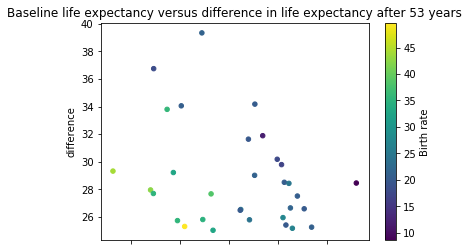

In [19]:
ax = df1.plot.scatter("Life Expectancy 1960", "difference", c='Birth rate', colormap='viridis')
ax.set_title("Baseline life expectancy versus difference in life expectancy after 53 years")
ax.set_xlabel("Life Expectancy in 1960")
print("correlation =", corr)

In [51]:
regions = qry("""
select `Life Expectancy 1960`, `Life Expectancy 2013`-`Life Expectancy 1960` as diff, Region
from COUNTRIES
group by Region
""")
list(regions["Life Expectancy 1960"])

[32.9848292682927,
 32.328512195122,
 62.2543658536585,
 52.2432195121951,
 70.8170731707317,
 65.5693658536586]

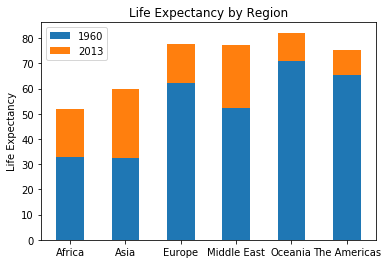

In [54]:
import numpy as np
import matplotlib.pyplot as plt


fig, ax = plt.subplots()

ax.bar(list(regions["Region"]), list(regions["Life Expectancy 1960"]), 0.5, label = "1960")
ax.bar(list(regions["Region"]), list(regions["diff"]), 0.5, label = "2013", bottom = list(regions["Life Expectancy 1960"]))

ax.set_ylabel('Life Expectancy')
ax.set_title('Life Expectancy by Region')
plt.legend()

plt.show()

In [55]:
qry("SELECT * FROM COUNTRIES")

,Country Name,Country Code,Birth rate,Internet users,Income Group,Region,Life Expectancy 1960,Life Expectancy 2013
0,Aruba,ABW,10.244,78.9,High income,The Americas,65.569366,75.328659
1,Afghanistan,AFG,35.253,5.9,Low income,Asia,32.328512,60.028268
2,Angola,AGO,45.985,19.1,Upper middle income,Africa,32.984829,51.866171
3,Albania,ALB,12.877,57.2,Upper middle income,Europe,62.254366,77.537244
4,United Arab Emirates,ARE,11.044,88.0,High income,Middle East,52.243220,77.195634
...,...,...,...,...,...,...,...,...
182,"Yemen, Rep.",YEM,32.947,20.0,Lower middle income,Middle East,34.363805,63.583512
183,South Africa,ZAF,20.850,46.5,Upper middle income,Africa,49.036293,56.736585
184,"Congo, Dem. Rep.",COD,42.394,2.2,Low income,Africa,41.018049,58.271927
185,Zambia,ZMB,40.471,15.4,Lower middle income,Africa,45.109805,59.237366


In [81]:
intr = qry("""
SELECT `Income Group`, Region, avg(`Internet users`)
FROM COUNTRIES
GROUP BY `Income Group`, Region
ORDER BY Region DESC
""")
intr

,Income Group,Region,avg(`Internet users`)
0,High income,The Americas,67.637692
1,Low income,The Americas,10.600000
2,Lower middle income,The Americas,24.674883
3,Upper middle income,The Americas,41.735855
4,High income,Oceania,70.796000
5,Lower middle income,Oceania,13.400000
6,Upper middle income,Oceania,36.050000
7,High income,Middle East,77.618340
8,Lower middle income,Middle East,23.100000
9,Upper middle income,Middle East,37.662500


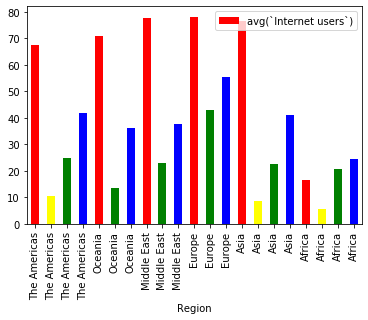

In [105]:
colors = {"High income": "red", "Upper middle income": "blue", 'Lower middle income': "green", "Low income": "yellow"}
#ax = plt.bar(list(intr["Region"]), list(intr["avg(`Internet users`)"]), color = intr["Income Group"].apply(lambda x: colors[x]))
intr.plot.bar("Region", "avg(`Internet users`)", color = intr["Income Group"].apply(lambda x: colors[x]))

In [ ]:

colors = {"Republican Party": "red", "Democratic Party": "blue", 'Democratic Party(serving as an Independent in the Senate)': "blue"}
ax = plt.barh(spending["Candidate"], spending["Receipts"], color = spending["Affiliation"].apply(lambda x: colors[x]))
plt.title("Campaign Spending 2020")
plt.xlabel("Dollars(Millions)")
plt.figure(figsize = (20,10))